<a href="https://colab.research.google.com/github/keshav-hl/Data-Science-Projects/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zomato Data Analysis

1. What type of restaurant do the majority of customers order from?

2. How many votes has each type of restaurant received from customers?

3. What are the ratings that the majority of restaurants have received?

4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5. Which mode (online or offline) has received the maximum rating?

6. Which type of restaurant received more offline orders, so that Zomato6 can prefere customers with some good offers?


---



In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dataframe = pd.read_csv('/content/Zomato data .csv')

In [43]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Convert the datatype of column - rate


---



In [45]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe['rate'].head()

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8


In [46]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [47]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


1. What type of restaurant do the majority of customers order from?


---



In [48]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [49]:
dataframe['listed_in(type)'].describe()

,listed_in(type)
count,148
unique,4
top,Dining
freq,110


Text(0.5, 0, 'Type of Restaurant')

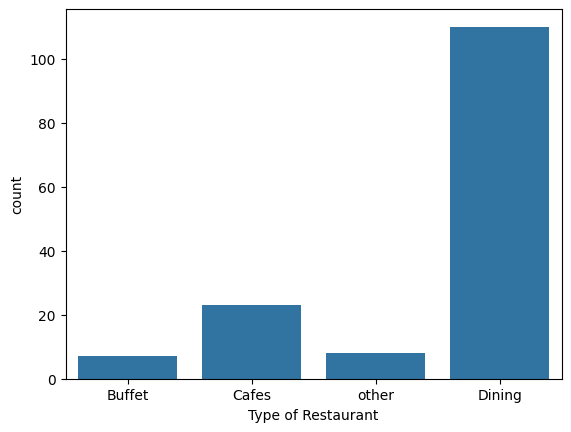

In [50]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurant")

2. How many votes has each type of restaurant received from customers?


---



In [51]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

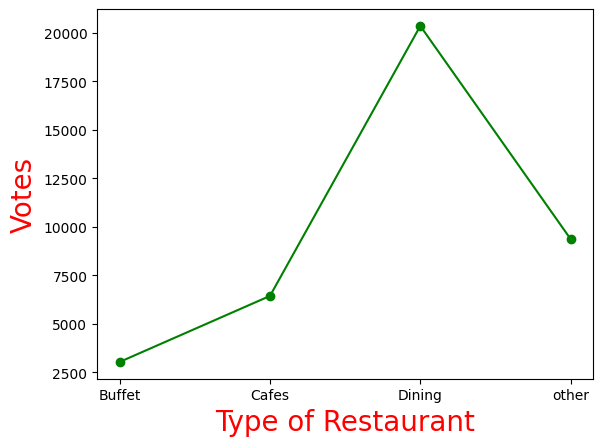

In [52]:
groupby_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':groupby_data})
plt.plot(result, c='green', marker='o')
plt.xlabel("Type of Restaurant", c='red', size=20)
plt.ylabel("Votes", c="red", size=20)

3. What are the ratings that the majority of restaurants have received?


---



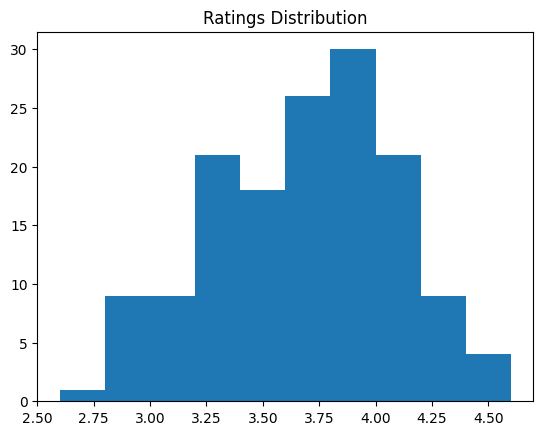

In [53]:
plt.hist(dataframe['rate'], bins = 10)
plt.title("Ratings Distribution")
plt.show()

4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?


---



In [54]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

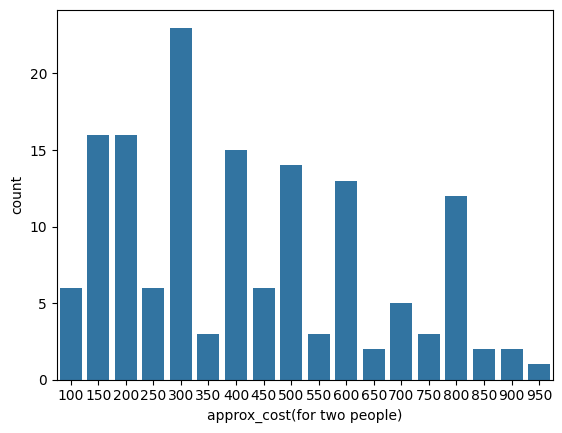

In [55]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

5. Which mode (online or offline) has received the maximum rating?


---



In [56]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [57]:
dataframe['online_order'].describe()

,online_order
count,148
unique,2
top,No
freq,90


<Axes: xlabel='online_order', ylabel='rate'>

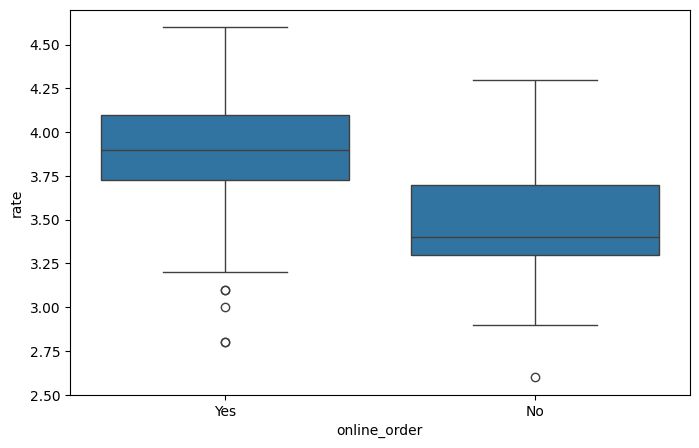

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=dataframe['online_order'], y = dataframe['rate'])

6. Which type of restaurant received more offline orders, so that Zomato can prefere customers with some good offers?


---



In [59]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


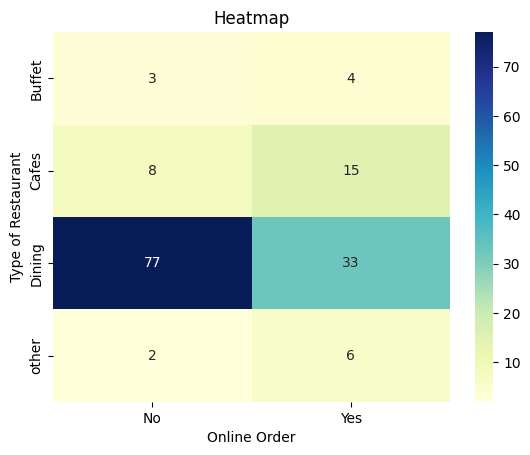

In [65]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order',
                                    aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.ylabel("Type of Restaurant")
plt.xlabel("Online Order")
plt.show()